In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [2]:
TD = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
TD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
TD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
TD.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
TD['Survived'].value_counts(normalize=True)


,proportion
Survived,
0,0.616162
1,0.383838


In [7]:
TD.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
TD['Age'] = TD.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.median())
)


In [9]:
TD['Cabin_known'] = TD['Cabin'].notna().astype(int)
TD.drop(columns=['Cabin'], inplace=True)


In [10]:
TD['Embarked'].fillna(TD['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-10-900678957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  TD['Embarked'].fillna(TD['Embarked'].mode()[0], inplace=True)


In [11]:
TD.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
print(TD['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [13]:
print(TD['Embarked'].value_counts())

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [14]:
print(TD['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

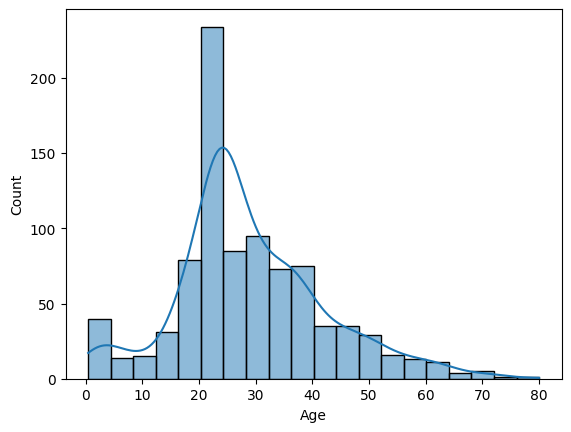

In [15]:
sns.histplot(TD['Age'], bins=20, kde=True)

The histogram shows that most passengers were young adults between 20 and 30 years old, with a strong peak around the early twenties. The distribution is right-skewed, with fewer older passengers. This indicates that younger people made up the majority of those onboard the Titanic.

***# Pclass counts***

<Axes: xlabel='Pclass', ylabel='count'>

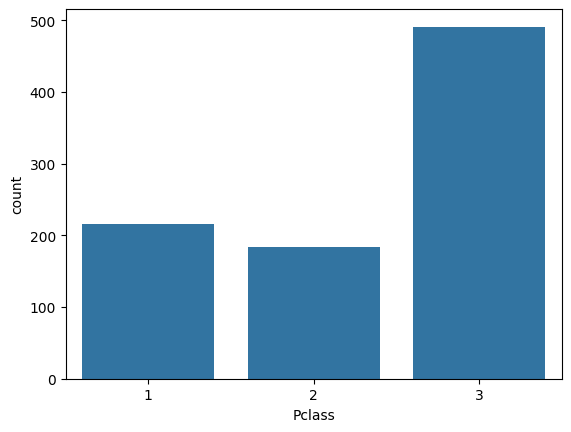

In [16]:
sns.countplot(data=TD, x='Pclass')

The bar plot shows that most passengers traveled in 3rd class, followed by 1st class and 2nd class. This indicates a larger proportion of lower-fare passengers on the Titanic.

***# Survival rate by sex***

<Axes: xlabel='Sex', ylabel='count'>

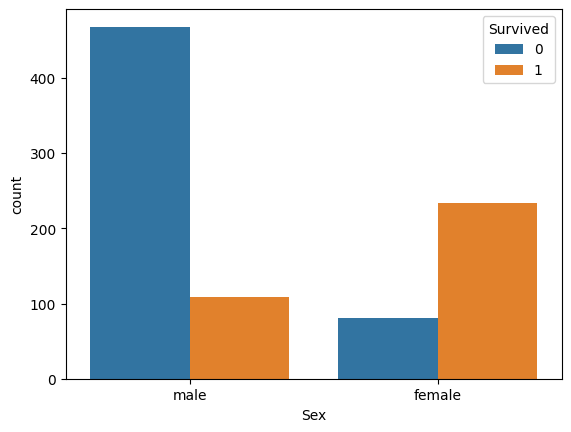

In [17]:
sns.countplot(data=TD, x='Sex', hue='Survived')

The chart shows that female passengers survived at a much higher rate than males. While most males did not survive, most females did. This indicates that gender was a key factor in survival.

In [18]:
TD.groupby('Sex')['Survived'].mean()      # Survival rate by sex

,Survived
Sex,
female,0.742038
male,0.188908


In [19]:
TD.groupby('Embarked')['Survived'].mean() # Survival rate by port

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [20]:
TD.groupby('Embarked')['Survived'].mean() # Survival rate by port

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


<Axes: xlabel='Pclass', ylabel='count'>

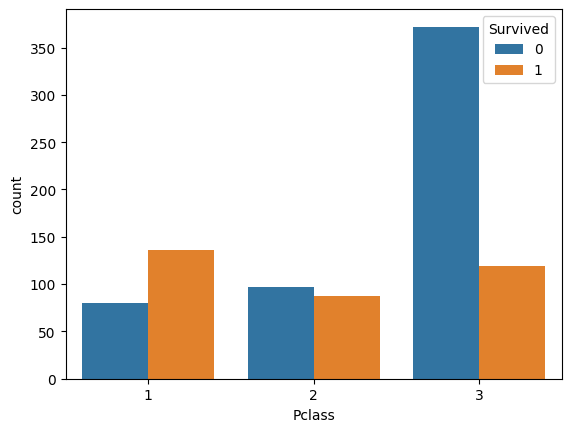

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=TD)

The chart shows that 1st class passengers had the highest survival rate, while most passengers in 3rd class did not survive. Survival rates decrease as ticket class lowers, indicating that socioeconomic status (as measured by Pclass) played a key role in who survived.

<Axes: xlabel='Survived', ylabel='Fare'>

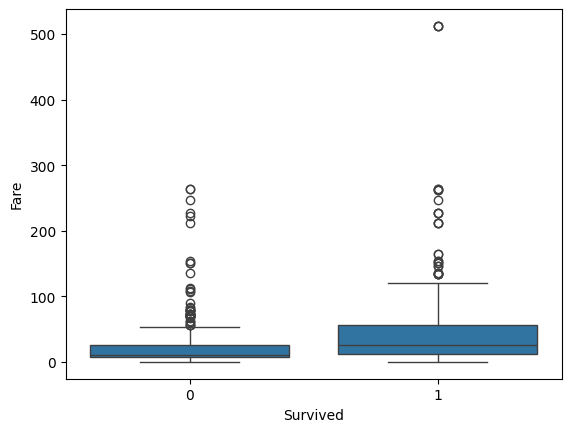

In [22]:
sns.boxplot(x='Survived', y='Fare', data=TD)

The boxplot shows that passengers who survived generally paid higher fares than those who did not. The median fare is noticeably higher for survivors, suggesting that wealthier passengers (often in higher classes) had a better chance of survival.

<Axes: xlabel='Age', ylabel='Count'>

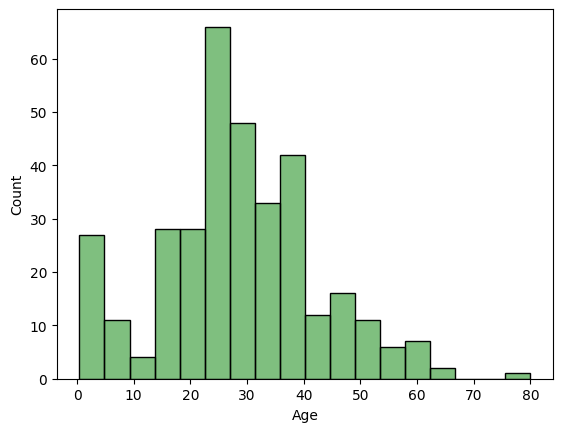

In [23]:
sns.histplot(TD[TD['Survived']==1]['Age'], color='green', label='Survived', alpha=0.5)

The histogram shows that most passengers were young adults aged between 20 and 35, with a noticeable peak around the mid-20s. There are fewer passengers at very young and older ages, making the age distribution right-skewed.

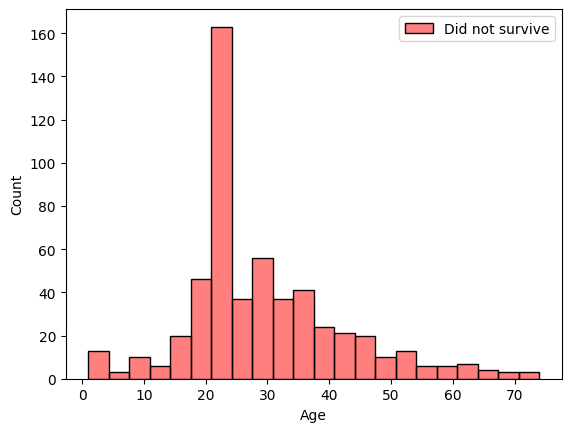

In [24]:
sns.histplot(TD[TD['Survived']==0]['Age'], color='red', label='Did not survive', alpha=0.5)
plt.legend()

The histogram shows that most of the people who did not survive were between 20 and 30 years old, with a prominent peak around the early 20s. Younger adults made up the largest proportion of non-survivors.

<Axes: >

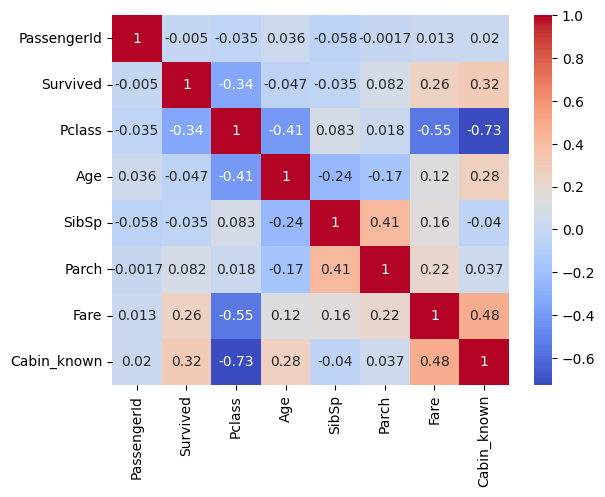

In [25]:
sns.heatmap(TD.corr(numeric_only=True), annot=True, cmap='coolwarm')

**Survival** is positively correlated with Fare **(0.26)** and Cabin_known **(0.32)**, indicating higher survival chances for passengers who paid more or had known cabin info.

**Pclass** shows a strong negative correlation with both Fare **(-0.55)** and Cabin_known **(-0.73)**, suggesting higher-class passengers paid more and had more complete data.

**SibSp** and Parch are positively correlated **(0.41)**, reflecting family groups traveling together.

Most other features like **Age** and **PassengerId** show weak or no significant correlation.

In [26]:
X = TD.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = TD['Survived']

# One-hot encode 'Sex' and 'Embarked' columns
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



The **RandomForestClassifier** with 100 trees was trained to predict passenger survival on the Titanic dataset. It performed well on the validation set, showing good accuracy by effectively capturing patterns in features like age, sex, and class. Using a fixed **random_state** ensures consistent and reproducible results.

In [31]:
# Make predictions on the test set
test_predictions = model.predict(X_test)


In [32]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': X_test['PassengerId'],  # Keep original IDs from X_test
    'Survived': test_predictions          # Predicted survival (0 or 1)
})

In [33]:
# Save to CSV
submission.to_csv('titanic_submission.csv', index=False)
print("Submission file created successfully!")

display(submission.head())

Submission file created successfully!


,PassengerId,Survived
709,710,0
439,440,0
840,841,0
720,721,1
39,40,0


 Each row maps a PassengerId to a predicted Survived value, where **1** indicates survival and **0** indicates non-survival.